In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GELAAIKQELAAIKKELAAIKWELAAIKQGAG', 'GELAAIKQELAAIKKELAAIKWELAAIKQGAG', 'GELAAIKQELAAIKKELAAIKWELAAIKQGAG']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 3),
    Parameter.static('Helix Length', 32),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 150, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['f'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[3, 32, 5.0, 150, 154.2]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	67   	-1071.64	436.749	-1637.02	-64.4033
1  	77   	-1494.16	107.578	-1733.18	-1246.28
2  	58   	-1566.72	72.581 	-1745.28	-1453.76
3  	75   	-1627.89	63.2965	-1762.56	-1524.83
4  	76   	-1684.57	48.9937	-1765.8 	-1594.57
5  	68   	-1726.07	26.8782	-1772.87	-1667.62
6  	61   	-1749.64	13.9932	-1772.87	-1722.85
7  	59   	-1758.5 	8.93872	-1773.36	-1740.54
8  	73   	-1765.78	5.11586	-1773.53	-1756.91
9  	68   	-1769.61	3.16158	-1773.53	-1761.42
10 	70   	-1771.63	1.439  	-1773.58	-1767.41
11 	77   	-1772.68	0.636489	-1773.64	-1771.15
12 	72   	-1773.17	0.290322	-1773.69	-1772.5 
13 	91   	-1773.38	0.169924	-1773.7 	-1773.02
14 	71   	-1773.51	0.094341	-1773.79	-1773.33
15 	75   	-1773.55	0.0720232	-1773.79	-1773.44
16 	84   	-1773.58	0.0690396	-1773.79	-1773.49
17 	65   	-1773.62	0.0668347	-1773.81	-1773.54
18 	48   	-1773.64	0.0648875	-1773.81	-1773.55
19 	83   	-1773.67	0.0697185	-1773.83	-1773.58
20 	64   	-1773.74	0.0619526	-1773.84	-17

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-1773.8668962729153

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

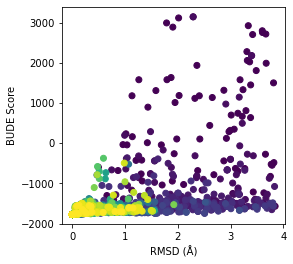

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('ga.png')

In [16]:
f = open('d_CC-Tet_trimer-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-840.768	876.304	-1718.77	1930.78
1  	100  	-1235.13	526.876	-1718.77	1322.56
2  	100  	-1479.57	257.602	-1740.65	108.861
3  	100  	-1596   	106.466	-1740.65	-1183  
4  	100  	-1644.76	68.3503	-1763.5 	-1283.15
5  	100  	-1666.76	54.0976	-1763.5 	-1480.99
6  	100  	-1684.4 	37.8585	-1763.5 	-1544.68
7  	100  	-1694.99	31.4714	-1763.5 	-1585.34
8  	100  	-1706.66	25.9887	-1763.5 	-1648.13
9  	100  	-1714.76	23.2082	-1763.5 	-1648.13
10 	100  	-1720.88	19.1495	-1763.5 	-1672.28
11 	100  	-1727.48	18.2992	-1763.5 	-1674.38
12 	100  	-1731.79	16.6809	-1763.5 	-1683.37
13 	100  	-1736.55	15.6848	-1763.5 	-1683.37
14 	100  	-1739.35	14.4135	-1763.5 	-1683.37
15 	100  	-1742.37	13.4296	-1763.5 	-1697.07
16 	100  	-1745.15	11.9718	-1763.5 	-1713.2 
17 	100  	-1747.53	10.5626	-1764.68	-1715.88
18 	100  	-1750.5 	9.01562	-1765.78	-1715.88
19 	100  	-1752.87	8.21775	-1770.64	-1724.24
20 	100  	-1754.8 	7.67368	-1770.97	-1724.24
21 	100  	-1757

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-1773.8701259685054

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

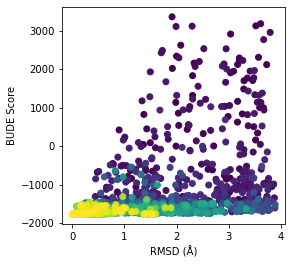

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('de.png')

In [23]:
f = open('d_CC-Tet_trimer-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-883.336	846.421	-1740.71	1544.75
1  	74   	-1350.28	586.281	-1767.93	1421.82
2  	35   	-1309.7 	463.401	-1767.93	1094.67
3  	52   	-978.675	643.646	-1740.71	864.311
4  	70   	-1177.99	643.878	-1738.08	1857.38
5  	65   	-1444.92	324.795	-1741.06	329.217
6  	41   	-1184.85	638.427	-1741.06	1682.06
7  	82   	-605.002	774.773	-1693.14	1492.96
8  	81   	-1214.47	652.105	-1745.83	2173.38
9  	58   	-1318.48	464.746	-1745.83	473.545
10 	24   	-1343.88	437.325	-1745.83	473.545
11 	44   	-1253.31	524.303	-1764.09	1842.53
12 	84   	-928.774	781.856	-1720.25	2328.88
13 	84   	-1373.74	468.992	-1779.06	1076.15
14 	40   	-1196.29	601.793	-1779.06	1076.15
15 	39   	-1023.58	676.414	-1779.06	916.933
16 	71   	-718.817	851.842	-1678.59	2522.55
17 	84   	-1212.6 	603.979	-1732.97	1290.58
18 	69   	-1303.77	497.761	-1770.74	745.812
19 	58   	-1332.69	476.646	-1770.74	803.093
20 	29   	-1298.48	519.9  	-1770.74	1335.64
21 	47   	-1243.41	596.428	-1738

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-1779.0565646763655

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

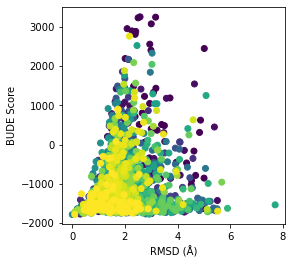

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('pso.png')

In [30]:
f = open('d_CC-Tet_trimer-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg    	std    	min     	max    
0  	100  	117.853	816.878	-1412.66	2148.04
1  	100  	-478.743	1347.62	-1731.43	3054.66
2  	100  	-1077.93	774.399	-1727.22	1375.27
3  	100  	-1507.77	223.819	-1749.02	-513.512
4  	100  	-1581.52	220.013	-1769.68	-315.871
5  	100  	-1641.39	74.1208	-1765.26	-1387   
6  	100  	-1631.95	73.1436	-1751.83	-1419.83
7  	100  	-1644.84	73.4554	-1766.77	-1384.11
8  	100  	-1661.81	70.2688	-1759.17	-1387.91
9  	100  	-1652.06	67.6365	-1759.5 	-1400.15
10 	100  	-1661.4 	62.892 	-1757.83	-1528.31
11 	100  	-1671.86	59.0346	-1756.56	-1575.35
12 	100  	-1705.4 	45.309 	-1756.86	-1584.37
13 	100  	-1738.43	18.6167	-1756.91	-1682.77
14 	100  	-1747.62	12.7145	-1756.95	-1696.26
15 	100  	-1751.44	8.51598	-1756.99	-1714.83
16 	100  	-1754.04	5.02278	-1757.53	-1725.66
17 	100  	-1748.87	10.8516	-1757.65	-1717.39
18 	100  	-1754.72	3.98047	-1757.43	-1735.83
19 	100  	-1755.41	3.45271	-1757.96	-1736.02
20 	100  	-1754.3 	4.23306	-1757.73	-1741.22
21 	100  	-1755.

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-1769.6773635756456

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

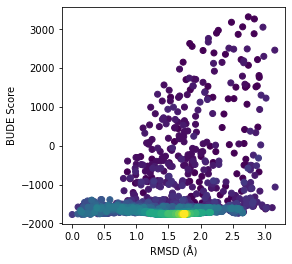

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('cmaes.png')

In [37]:
f = open('d_CC-Tet_trimer-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)